In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets import fetch_openml
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
# allow plots to appear within the notebook
%matplotlib inline

In [3]:
data = pd.read_csv('OnlineRetail.csv',
                   parse_dates = ['InvoiceDate'],
                   dtype={'CustomerID': str,'InvoiceNo': str})

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.isna().head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [9]:
data[data.isna()['CustomerID'] == True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [17]:
data['Available'] = data['CustomerID'].notnull()
data['Not_Available'] = data['CustomerID'].isnull()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Available,Not_Available
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True,False


In [20]:
invoice_cust_id = data.groupby("InvoiceNo").agg({"Available" : "sum",
                                                       "Not_Available" :  "sum"})
invoice_cust_id.columns = ['available', 'not_available']
invoice_cust_id.head()

,available,not_available
InvoiceNo,,
536365,7,0
536366,2,0
536367,12,0
536368,4,0
536369,1,0


In [25]:
invoice_cust_id[invoice_cust_id['available'] > 0 ]

,available,not_available
InvoiceNo,,
536365,7,0
536366,2,0
536367,12,0
536368,4,0
536369,1,0
...,...,...
C581484,1,0
C581490,2,0
C581499,1,0


In [26]:
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [27]:
data.isna().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
Available        0
Not_Available    0
dtype: int64

In [28]:
data[data['UnitPrice'] == 0].count()

InvoiceNo        40
StockCode        40
Description      40
Quantity         40
InvoiceDate      40
UnitPrice        40
CustomerID       40
Country          40
Available        40
Not_Available    40
dtype: int64

In [30]:
import datetime as dt

In [31]:
print(data['InvoiceDate'].max())
current_date = dt.datetime(2011,12,11)

2011-12-09 12:50:00


In [32]:
data=data[data['UnitPrice']!=0]

In [33]:
#How many cancelled invoices
len(data[data['InvoiceNo'].str.startswith('C')])

8905

In [34]:
#Delete cancelled invoices starting with C
data = data[~data['InvoiceNo'].str.startswith('C')]

In [35]:
#Calculate TotalCost and store in a seprate column
data['TotalCost'] = data['Quantity'] * data['UnitPrice']

In [36]:
rfm = data.groupby("CustomerID").agg({"InvoiceDate" : lambda InvoiceDate :(current_date - InvoiceDate.max()).days,  # Recency
                                     "InvoiceNo" : lambda InvoiceNo: InvoiceNo.nunique(),  # Frequency
                                     "TotalCost":  lambda TotalCost: TotalCost.sum()})    # Monetary
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,3,7,4310.00
12348,76,4,1797.24
12349,19,1,1757.55
12350,311,1,334.40


In [37]:
import seaborn as sns

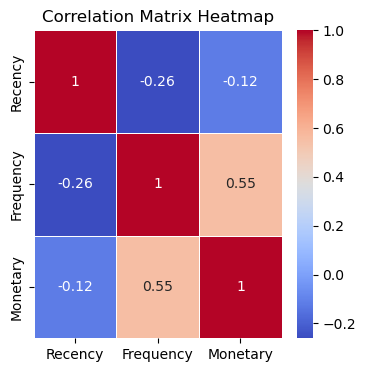

In [38]:
corr_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

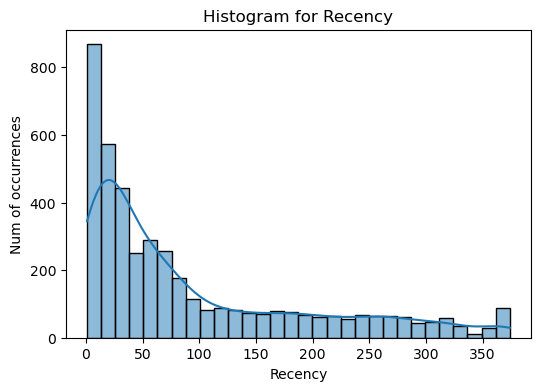

In [39]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm, x='Recency', bins=30, kde=True)
plt.title('Histogram for Recency')
plt.xlabel('Recency')
plt.ylabel('Num of occurrences')
plt.show()

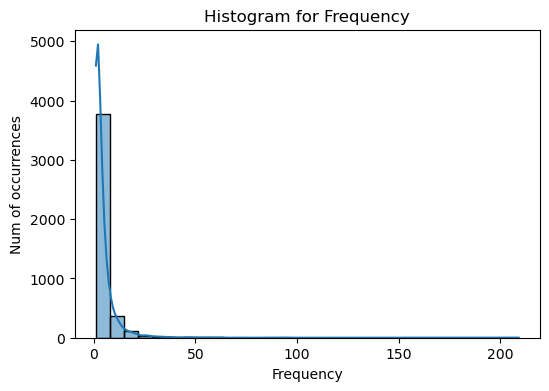

In [40]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm, x='Frequency', bins=30, kde=True)
plt.title('Histogram for Frequency')
plt.xlabel('Frequency')
plt.ylabel('Num of occurrences')
plt.show()

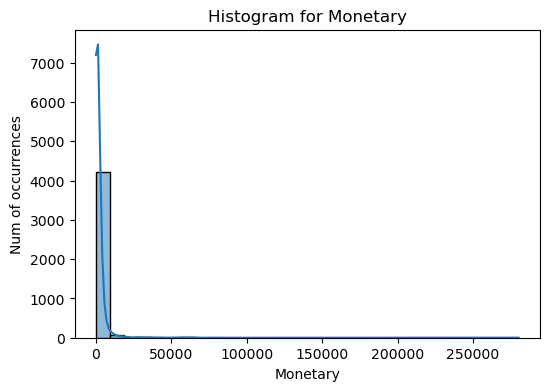

In [41]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm, x='Monetary', bins=30, kde=True)
plt.title('Histogram for Monetary')
plt.xlabel('Monetary')
plt.ylabel('Num of occurrences')
plt.show()

In [42]:
cols_for_clustering = ['Recency', 'Frequency', 'Monetary']
rfm_log = rfm.copy()
rfm_log[cols_for_clustering] = rfm[cols_for_clustering].apply(np.log1p)
rfm_log.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,3.857192,1.345582,6.593627
std,1.307060,0.683104,1.257578
min,0.693147,0.693147,1.558145
25%,2.944439,0.693147,5.731446
50%,3.951244,1.098612,6.515431
75%,4.968071,1.791759,7.416222
max,5.926926,5.347108,12.543284


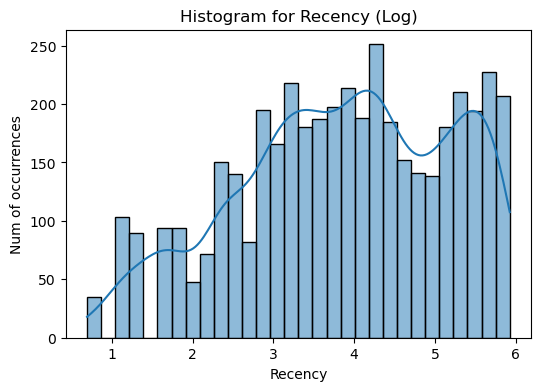

In [43]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm_log, x='Recency', bins=30, kde=True)
plt.title('Histogram for Recency (Log)')
plt.xlabel('Recency')
plt.ylabel('Num of occurrences')
plt.show()

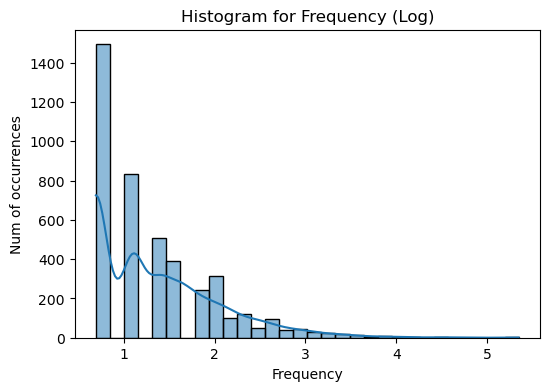

In [44]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm_log, x='Frequency', bins=30, kde=True)
plt.title('Histogram for Frequency (Log)')
plt.xlabel('Frequency')
plt.ylabel('Num of occurrences')
plt.show()

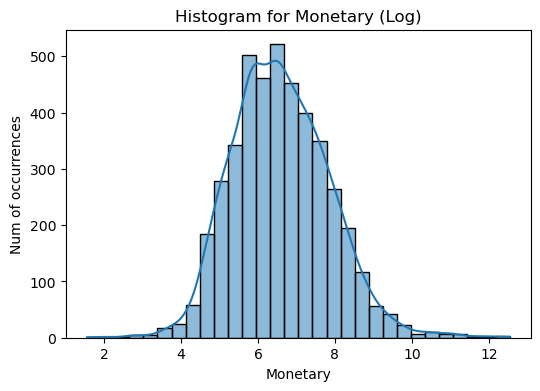

In [45]:
plt.figure(figsize=(6, 4))  
sns.histplot(data=rfm_log, x='Monetary', bins=30, kde=True)
plt.title('Histogram for Monetary (Log)')
plt.xlabel('Monetary')
plt.ylabel('Num of occurrences')
plt.show()

In [48]:
#How many clusters
X = rfm_log[cols_for_clustering]
inertia_list = []
for K in range(2,12):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

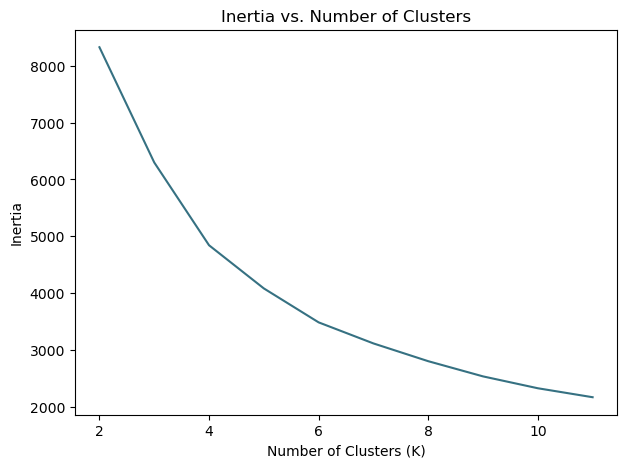

In [49]:
plt.figure(figsize=[7,5])
plt.plot(range(2,12), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [52]:
model = KMeans(n_clusters=6, random_state = 7)
model.fit(rfm_log[cols_for_clustering])
rfm_log['Cluster'] = model.predict(rfm_log[cols_for_clustering])
rfm['Cluster'] = rfm_log.Cluster

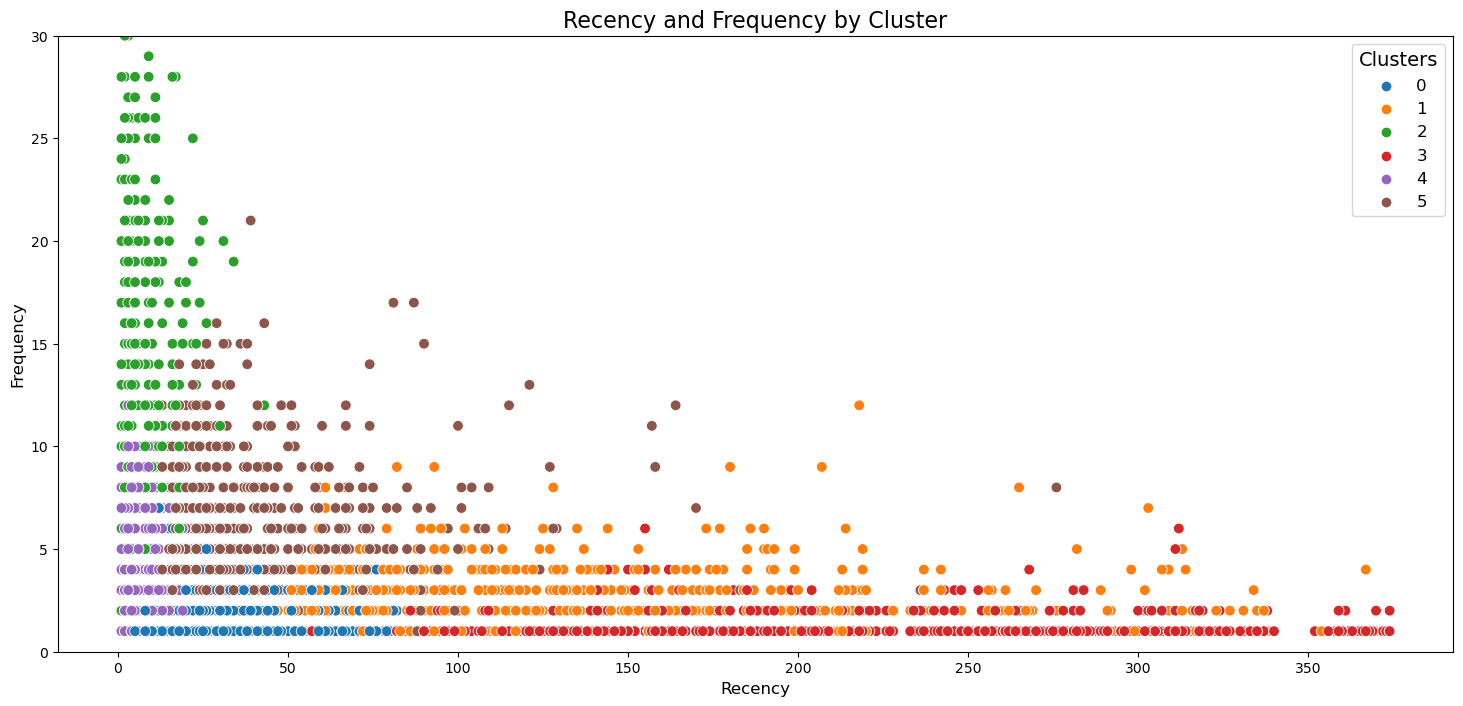

In [53]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="Recency", y="Frequency", hue="Cluster", palette='tab10', s=60
)
plt.title("Recency and Frequency by Cluster", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Clusters", title_fontsize=14)
plt.ylim(0, 30)  #the axis needs limiting because of the high number of outliers
plt.show()

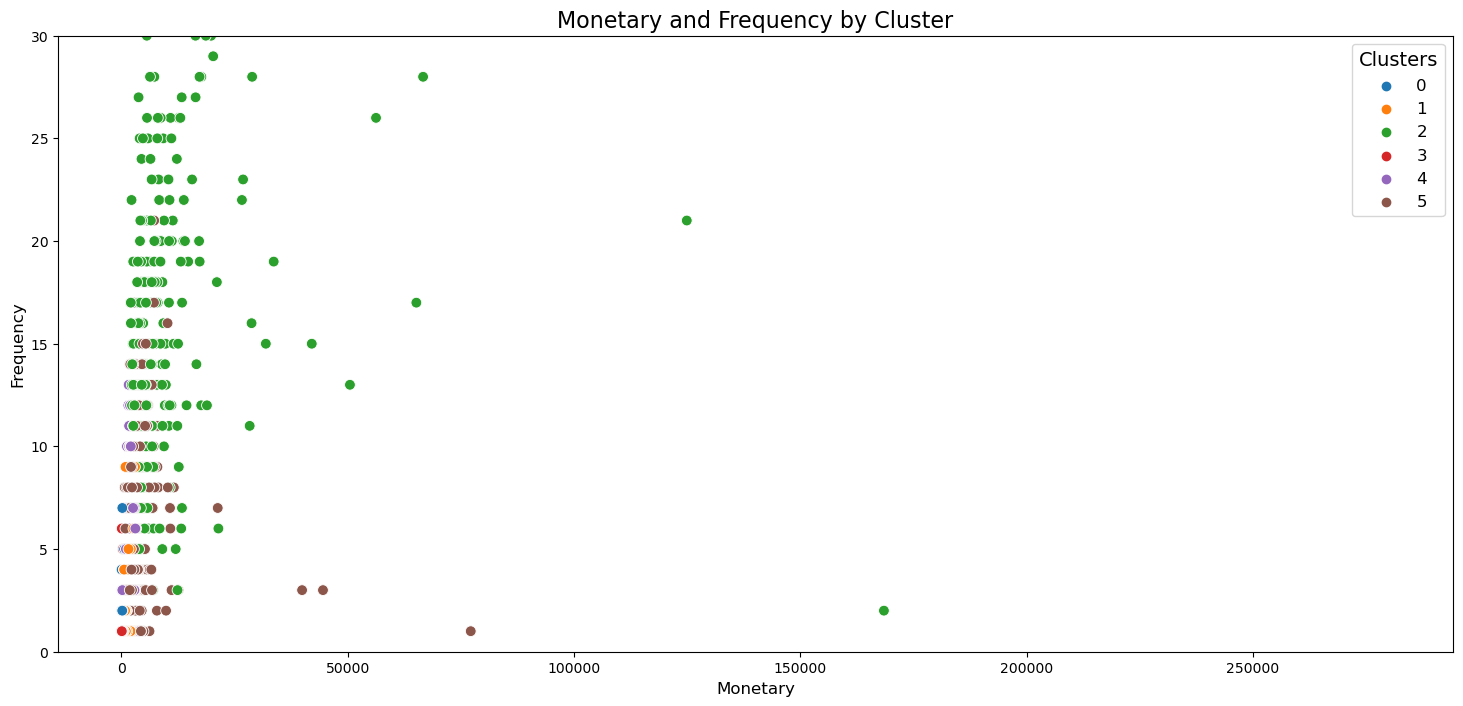

In [54]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="Monetary", y="Frequency", hue="Cluster", palette='tab10', s=60
)
plt.title("Monetary and Frequency by Cluster", size=16)
plt.xlabel("Monetary", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Clusters", title_fontsize=14)
plt.ylim(0, 30)  #the axis needs limiting because of the high number of outliers
plt.show()